# Homework 1
### CSE 802
### David Rackerby

1. The iris (flower) dataset consists of 150 4-dimensional patterns (i.e., feature vectors) belonging to three
classes (setosa=1, versicolor=2, and virginica=3). There are 50 patterns per class. The 4 features
correspond to sepal length in cm (x1), sepal width in cm (x2), petal length in cm (x3), and petal width
in cm (x4). Note that the class labels are indicated at the end of every pattern.

(a) [3 points] Compute and report the mean pattern vector, i.e., the centroid, of each class.

In [1]:
%matplotlib notebook
from typing import List, Tuple

import numpy as np

def grab_classes(filename: str) -> Tuple[List[np.ndarray]]:
    with open(filename) as file:
        c1, c2, c3 = [], [], []
        for line in file.readlines():
            vec = line.split()
            measurements, iris_class = np.array(list(map(lambda k: float(k), vec[:-1]))), int(vec[-1])
            if iris_class == 1:
                c1.append(measurements)
            elif iris_class == 2:
                c2.append(measurements)
            elif iris_class == 3:
                c3.append(measurements)
            else:
                raise Exception("Unexpected class id")
        return c1, c2, c3

def calculate_mean_vector(data: [List[np.ndarray]]) -> np.ndarray:
    mean = sum(data) / len(data)
    return mean

setosa, versicolor, virginica = grab_classes("iris_data.txt")
setosa_mean, versicolor_mean, virginica_mean = calculate_mean_vector(setosa), calculate_mean_vector(versicolor), calculate_mean_vector(virginica)
print("Setosa mean vector:", setosa_mean)
print("Versicolor mean vector:", versicolor_mean)
print("Virginica mean vector:", virginica_mean)

Setosa mean vector: [5.006 3.418 1.464 0.244]
Versicolor mean vector: [5.936 2.77  4.26  1.326]
Virginica mean vector: [6.588 2.974 5.552 2.026]


(b) [3 points] For each class, determine the pattern (i.e., vector) from that class which is the farthest
from the class mean. You can use the Euclidean distance metric for this problem.

In [2]:
def calculate_highest_deviation(data: List[np.ndarray], mean: np.ndarray) -> np.ndarray:
    return max(data, key=lambda x: np.linalg.norm(x - mean))

print("Farthest setosa vector from the mean:", calculate_highest_deviation(setosa, setosa_mean))
print("Farthest versicolor vector from the mean:", calculate_highest_deviation(versicolor, versicolor_mean))
print("Farthest virginica vector from the mean:", calculate_highest_deviation(virginica, virginica_mean))

Farthest setosa vector from the mean: [4.5 2.3 1.3 0.3]
Farthest versicolor vector from the mean: [5.1 2.5 3.  1.1]
Farthest virginica vector from the mean: [4.9 2.5 4.5 1.7]


(c) [8 points] For each feature, plot the histograms pertaining to the 3 classes. Your output should
contain 4 graphs corresponding to the 4 features; each graph should contain 3 histograms corre-
sponding to the 3 classes (choose a bin size of your choice for the histograms). Based on these
plots, indicate (a) the features that are likely to be useful for distinguishing the 3 classes, and (b)
the classes that are likely to overlap with each other to a great extent. Provide an explanation for
your answer.

<IPython.core.display.Javascript object>


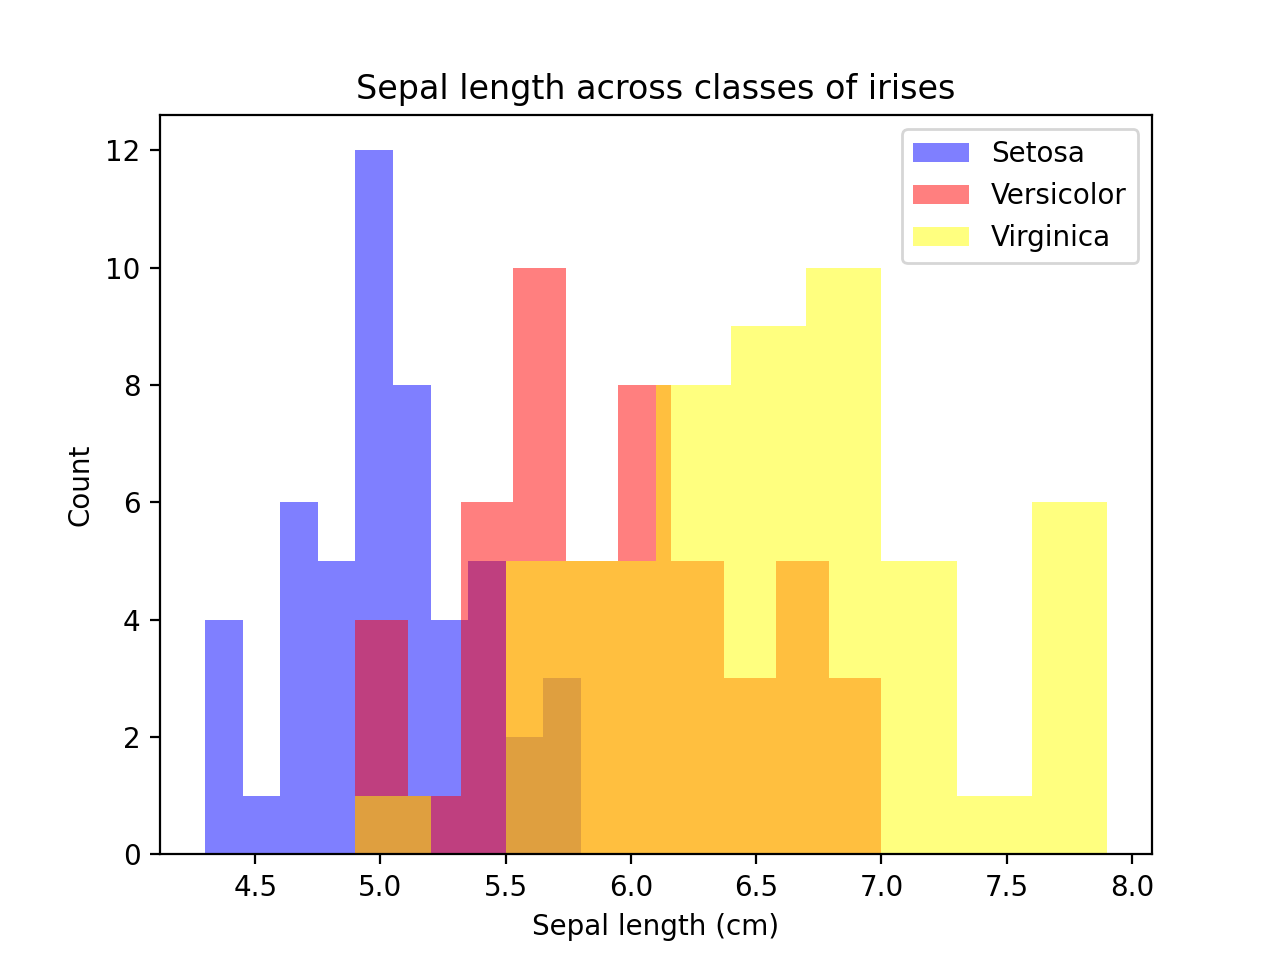

<IPython.core.display.Javascript object>


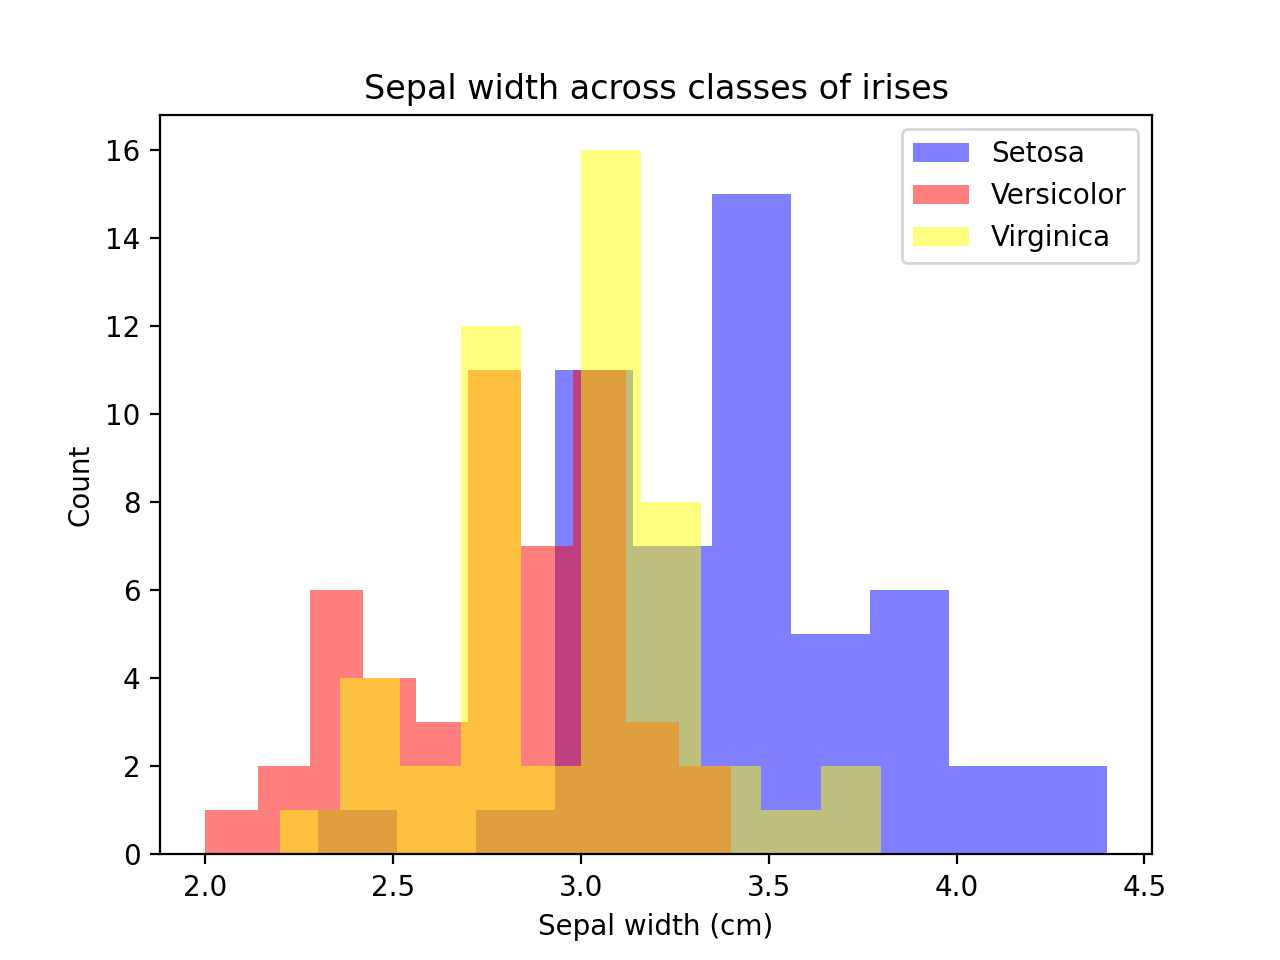

<IPython.core.display.Javascript object>


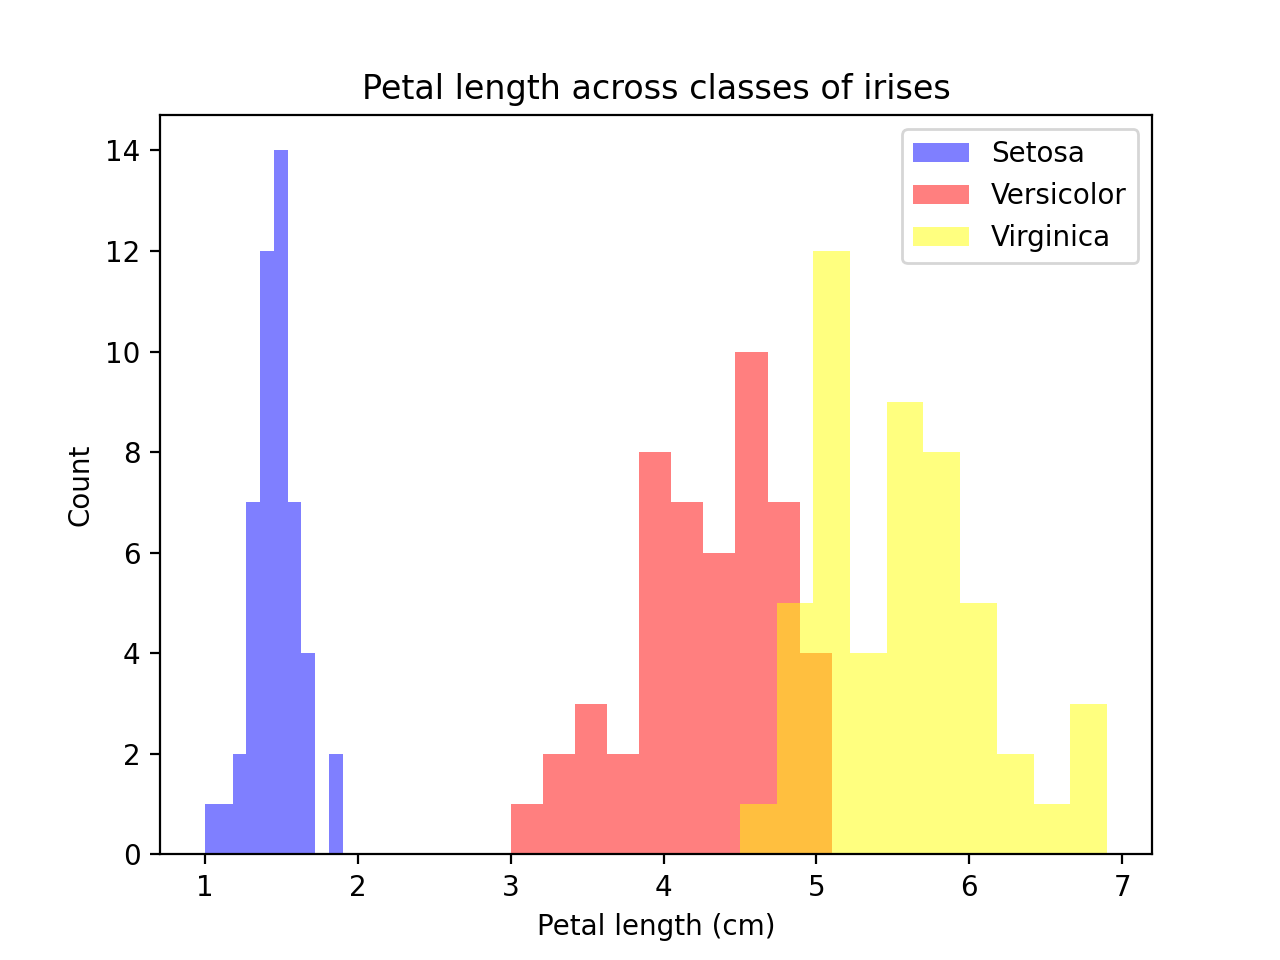

<IPython.core.display.Javascript object>


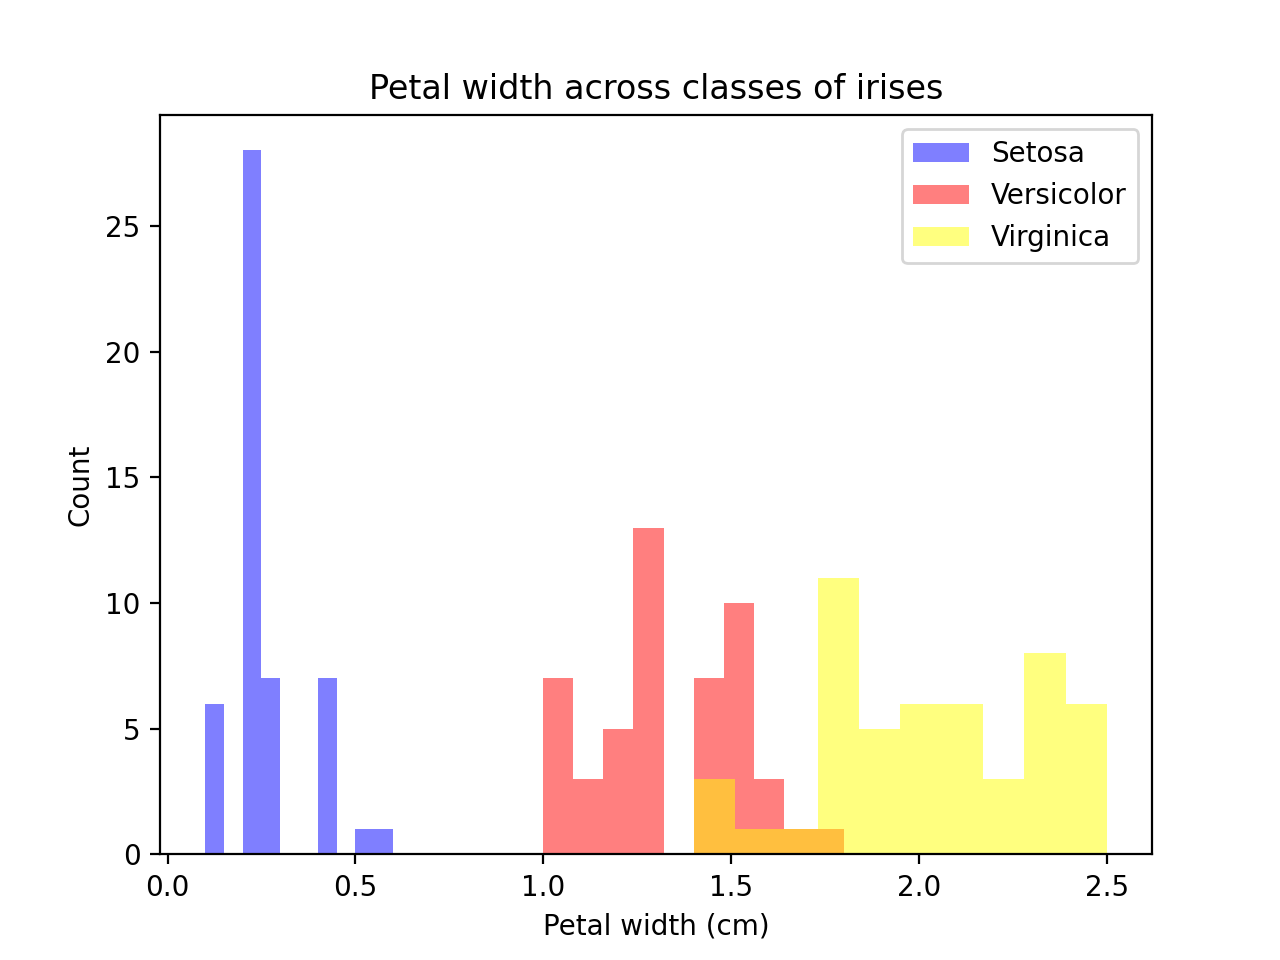

In [3]:
import matplotlib.pyplot as plt

x1_hist = plt.figure()
plt.xlabel("Sepal length (cm)")
plt.ylabel("Count")
plt.title("Sepal length across classes of irises")
plt.hist(np.array(setosa)[:,0], alpha=0.5, label='Setosa', color='blue')
plt.hist(np.array(versicolor)[:,0], alpha=0.5, label='Versicolor', color='red')
plt.hist(np.array(virginica)[:,0], alpha=0.5, label='Virginica', color='yellow')
plt.legend(loc='upper right')

x2_hist = plt.figure()
plt.xlabel("Sepal width (cm)")
plt.ylabel("Count")
plt.title("Sepal width across classes of irises")
plt.hist(np.array(setosa)[:,1], alpha=0.5, label='Setosa', color='blue')
plt.hist(np.array(versicolor)[:,1], alpha=0.5, label='Versicolor', color='red')
plt.hist(np.array(virginica)[:,1], alpha=0.5, label='Virginica', color='yellow')
plt.legend(loc='upper right')

x3_hist = plt.figure()
plt.xlabel("Petal length (cm)")
plt.ylabel("Count")
plt.title("Petal length across classes of irises")
plt.hist(np.array(setosa)[:,2], alpha=0.5, label='Setosa', color='blue')
plt.hist(np.array(versicolor)[:,2], alpha=0.5, label='Versicolor', color='red')
plt.hist(np.array(virginica)[:,2], alpha=0.5, label='Virginica', color='yellow')
plt.legend(loc='upper right')


x4_hist = plt.figure()
plt.xlabel("Petal width (cm)")
plt.ylabel("Count")
plt.title("Petal width across classes of irises")
plt.hist(np.array(setosa)[:,3], alpha=0.5, label='Setosa', color='blue')
plt.hist(np.array(versicolor)[:,3], alpha=0.5, label='Versicolor', color='red')
plt.hist(np.array(virginica)[:,3], alpha=0.5, label='Virginica', color='yellow')
plt.legend(loc='upper right')

# plt.show()

![](assets/sepal_length.png)
![](assets/sepal_width.png)
![](assets/petal_length.png)
![](assets/petal_width.png)
(a) The petal width and petal length features are the two most likely features to be useful for distinguishing the three classes due to lower amount of inter-class similarity and generally lower overlap (when compared to sepal length and sepal width).

(b) The versicolor and virginica classes likely to overlap with one another to a great extent. Across all four measured features, their histograms overlap to some degree. Whereas the setosa class displays no overlap for at least two of the four features.

(d) [5 points] Assume that each pattern can be represented by features x1 and x2. This means, each
pattern can be viewed as a point in 2-dimensional space. Draw a scatter plot showing all 150
patterns (use different labels/markers to distinguish between classes). Draw another scatter plot
based on features x3 and x4. Based on these scatter plots, explain which of the two feature subsets
({x1, x2} or {x3, x4}) is likely to be useful for separating the 3 classes.

<IPython.core.display.Javascript object>


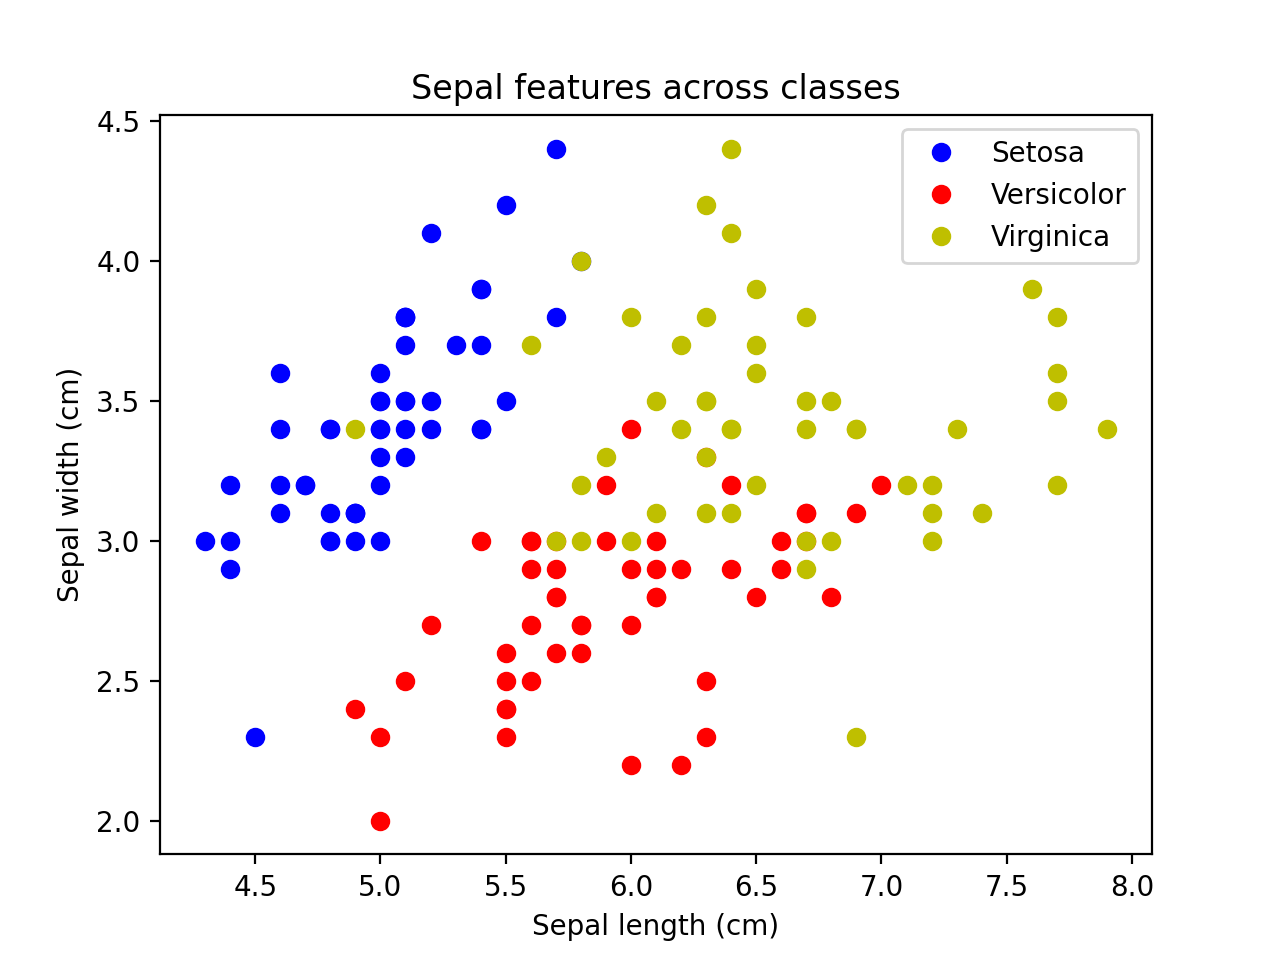

<IPython.core.display.Javascript object>


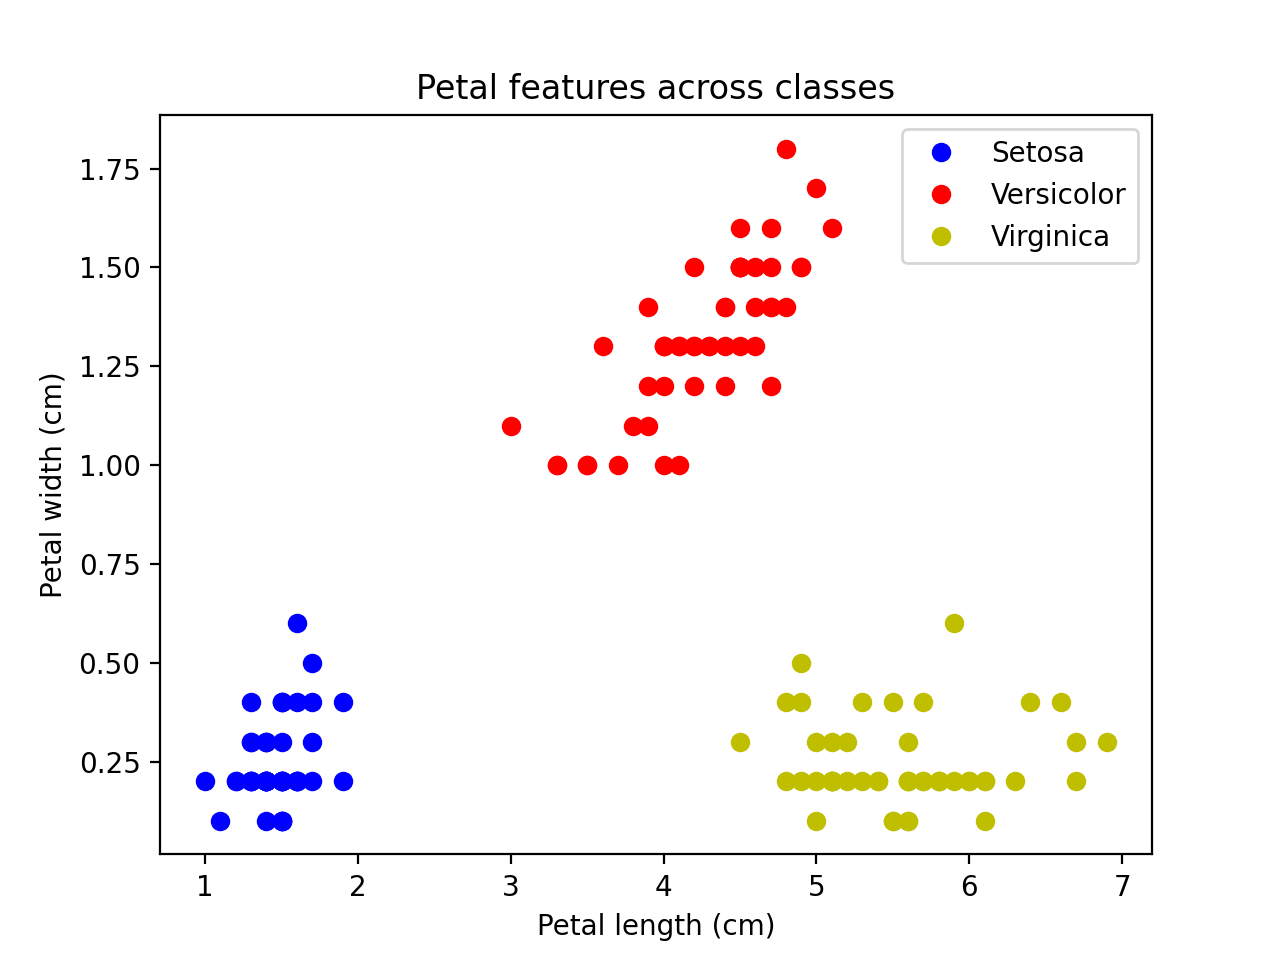

In [4]:
s1 = plt.figure()
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Sepal features across classes")
plt.plot(np.array(setosa)[:,0], np.array(setosa)[:,1], 'bo', label='Setosa')
plt.plot(np.array(versicolor)[:,0], np.array(versicolor)[:,1], 'ro', label='Versicolor')
plt.plot(np.array(virginica)[:,0], np.array(setosa)[:,1], 'yo', label='Virginica')
plt.legend()

s2 = plt.figure()
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Petal features across classes")
plt.plot(np.array(setosa)[:,2], np.array(setosa)[:,3], 'bo', label='Setosa')
plt.plot(np.array(versicolor)[:,2], np.array(versicolor)[:,3], 'ro', label='Versicolor')
plt.plot(np.array(virginica)[:,2], np.array(setosa)[:,3], 'yo', label='Virginica')
plt.legend()

Compared to {x1, x2}, {x3, x4} is much more useful for reducing the amount of overlap between classes. Using {x3, x4}, it's likely very trivial to draw up simple decision boundaries with few errors to classify unseen data.

(e) [4 points] Assume that each pattern can be represented by features {x1, x2, x4}. Draw a 3-dimensional
scatter plot showing all 150 patterns. Based on this scatter plot, explain which classes overlap with
each other to a great extent. (You may have to rotate the plot to get a better view of the overlapping
classes).

<IPython.core.display.Javascript object>


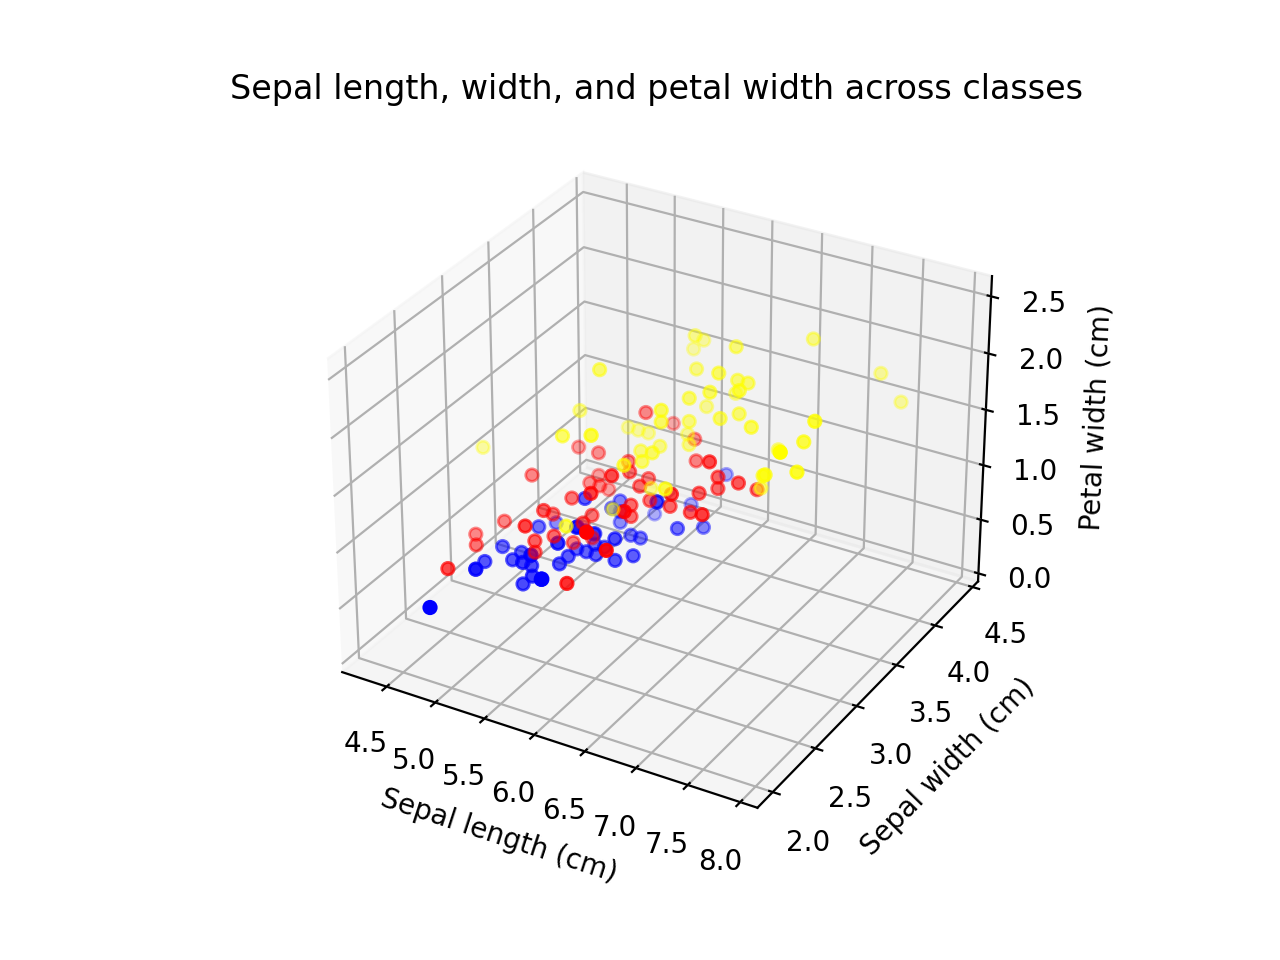

In [5]:
scatter_3d = plt.figure()
ax = plt.axes(projection="3d")
plt.title("Sepal length, width, and petal width across classes")
ax.set_xlabel("Sepal length (cm)")
ax.set_ylabel("Sepal width (cm)")
ax.set_zlabel("Petal width (cm)")

ax.scatter3D(np.array(setosa)[:,0], np.array(setosa)[:,1], np.array(setosa)[:,3], color='blue')
ax.scatter3D(np.array(versicolor)[:,0], np.array(versicolor)[:,1], np.array(versicolor)[:,3], color='red')
ax.scatter3D(np.array(virginica)[:,0], np.array(virginica)[:,1], np.array(virginica)[:,3], color='yellow')
plt.show()


![](assets/three_feature_scatter.png)
![](assets/three_feature_topdown.png)


Based on the scatter plot, the versicolor and virginica classes have a fair bit of overlap with one another while the setosa class has very little overlap with both of the aforementioned.

(f) [2 points] Given a set of 4-dimensional patterns belonging to two classes, describe a way to deter-
mine the extent of overlap (i.e., the degree of overlap) between the two classes?

Similar to the earlier section of this assignment, one can create histograms as a way to visualize the overlap in individual features. Using all histograms, one can empirically reason that if there's overlap in several features, then the overall overlap must also be great. If one wants to take an analytical approach, and has access to the probability density functions of both classes, then they can calculate the Bayesian error rate and quantify how much overlap there is based on the error yielded.

2. [15 points] Describe each of the following terms with an example: (a) generalization, (b) intra-class
variation, (c) decision boundary, (d) reinforcement learning, (e) invariant representation.

(a) Generalization - the concept of accurately modeling the true nature of and differences between groups. For example, a decision boundary has good generalization when it's able to correctly classify objects of all classes for which it's designed to.

(b) Intra-class variation - the concept that objects of the same class can have drastically different features despite being of the same class. For example, when trying to determine whether an object is an apple or not, one finds that the size, shape, color, texture, and other traits vary widely from sample to sample.

(c) Decision boundary - a decision boundary is a statistical entity that separates classes from one another and is used to classify unseen data. An example is the boundary covered in class, where a 1-dimensional decision boundary distinguishes between salmon and sea bass.

(d) Reinforcement learning - a classifier learning technique where the only feedback given to the classifier is that its answer is either right or wrong. For example, if a classifier misclassifies an apple when it's actually an orange, it doesn't say *how* it was wrong, just that it was.

(e) Invariant representation - a pattern representation being unaffected by non-meaningful or irrelevant differences in the sample. Using the fish example discussed in class, the actual orientation and location of the fish on the conveyor belt, as it is scanned, could vary. This orientation and positional difference has nothing to do with the fish itself, and thus we'd like our pattern representation to be invariant to such differences.

3. [20 points] The paper Leafsnap: A Computer Vision System for Automatic Plant Species Identification by
Kumar et al discusses a pattern classification system that determines plant species using automatic visual
recognition.

(a) Briefly describe this system based on the pattern recognition terminology developed in class: (i)
sensors used; (ii) segmentation method; (iii) features extracted; and (iv) classification model.
How many features (i.e., d) and classes (i.e., c) are present?

(i) Leafsnap is a mobile app, thus the sensor used is a simple phone or handheld device camera.
(ii) Leafsnap's segmentation method uses the shapes of leaves to estimate where the plant is. It "estimates the foreground and background color distributions" to classify a pixel as belonging to a plant.
(iii) The main feature used is leaf curvature. The curvature of a leaf is extracted using a curvature image, from which Histograms of Curvature over Scale (HoCS) feature is formed.
(iv) The model performs a nearest neighbors search on the search database, uses the histogram intersection distance to compare two HoCS features, and then returns the top 25 results to the user. The user then compares the physical plant they have to the photographs returned.
The feature dimensionality is 525 and, as of the paper's writing, 184 tree species considered as present classes.

(b) How was classifier training accomplished? How many patterns were available in the training set?
How were the training patterns labeled?

The classifier is implemented using a gist descriptor and a support vector machine. It was trained on 5,972 manually labeled images, wherein each class is present as labels.

(c) How was the performance of the pattern recognition system evaluated? What metrics were used
to evaluate classifier performance?

The system performance was evaluated as follows: "perform a leave-one-image-out species identification and match against all other images in the database." However, instead of matching images, it actually tries to  match species. This is because the application itself returns a list of matched species to the user. Quantitatively, it measures the percentage of queries that have a species match rank of X, where X denotes the top X images wherein the correct species exists. For example 96.8% of queries have a species match rank of 5 or lower, so within the top 5 results the correct species is returned.

(d) In your opinion, did the proposed pattern recognition system perform well? Why or why not?

I would argue the system performed well due to how few images needed to be returned from a good-quality image in order to accurately match the leaf species. Additionally, the authors draw attention to the fact that their feature-extraction algorithm is far more efficient compared to some other contemporary model, choosing histograms and integral measures for their ease of use and lack of tendency to add noise.

4. [15 points] What type of learning scheme - supervised, unsupervised, or reinforcement - can be used to
address each of the following problems. You must justify your answer.
(a) Teaching a computer to play chess.
(b) Given a set of sea-shells, group them into multiple categories.
(c) Determining the make and model of a car based on its side-view image.
(d) Predicting whether it would rain or not in the next 24 hours based on current weather conditions
such as precipitation, humidity, temperature, wind, pressure, etc.
(e) Segmenting a digital image into multiple regions such that each region has a distinct color or
texture.

(a) Reinforcement can be used since every chess move can arguably be a categorized as "good" or "bad," which reinforcement learning utilizes to teach the chess engine.

(b) Unsupervised learning can be used here since the initial set isn't said to be labeled and/or categorized. Instead, the problem is to group them into categories, which unsupervised learning is better suited for.

(c) Supervised learning can be used here, since the goal is to determine the unknown characteristics of a given car. Using supervised learning, a classifier can use labeled side-view images to distinguish cars from one another into discrete classes.

(d) Supervised learning can be used here, since the goal is to classify a set of features (weather conditions) as a binary output ("rain" or "no rain"). It's possible to teach a classifier to determine whether something is a rainstorm using labeled training data where precipitation, humidity, temperature, and other features are present.

(e) Unsupervised learning works here, since the goal is to cluster distinct regions apart from the original image i.e. find classes of color or texture.

5. Consider the problem of classifying two-dimensional patterns of the form x = (x1, x2)t into one of two
categories, ω1 or ω2. Using the labeled patterns presented in this data set1, do the following.

(a) [8 points] Plot the histograms (bin size = 1) corresponding to (x1|ω1) and (x1|ω2) in a graph.2.
Also, plot the histograms (bin size = 1) corresponding to (x2|ω1) and (x2|ω2) in a separate graph.
Is x1 more discriminatory than x2?

<IPython.core.display.Javascript object>


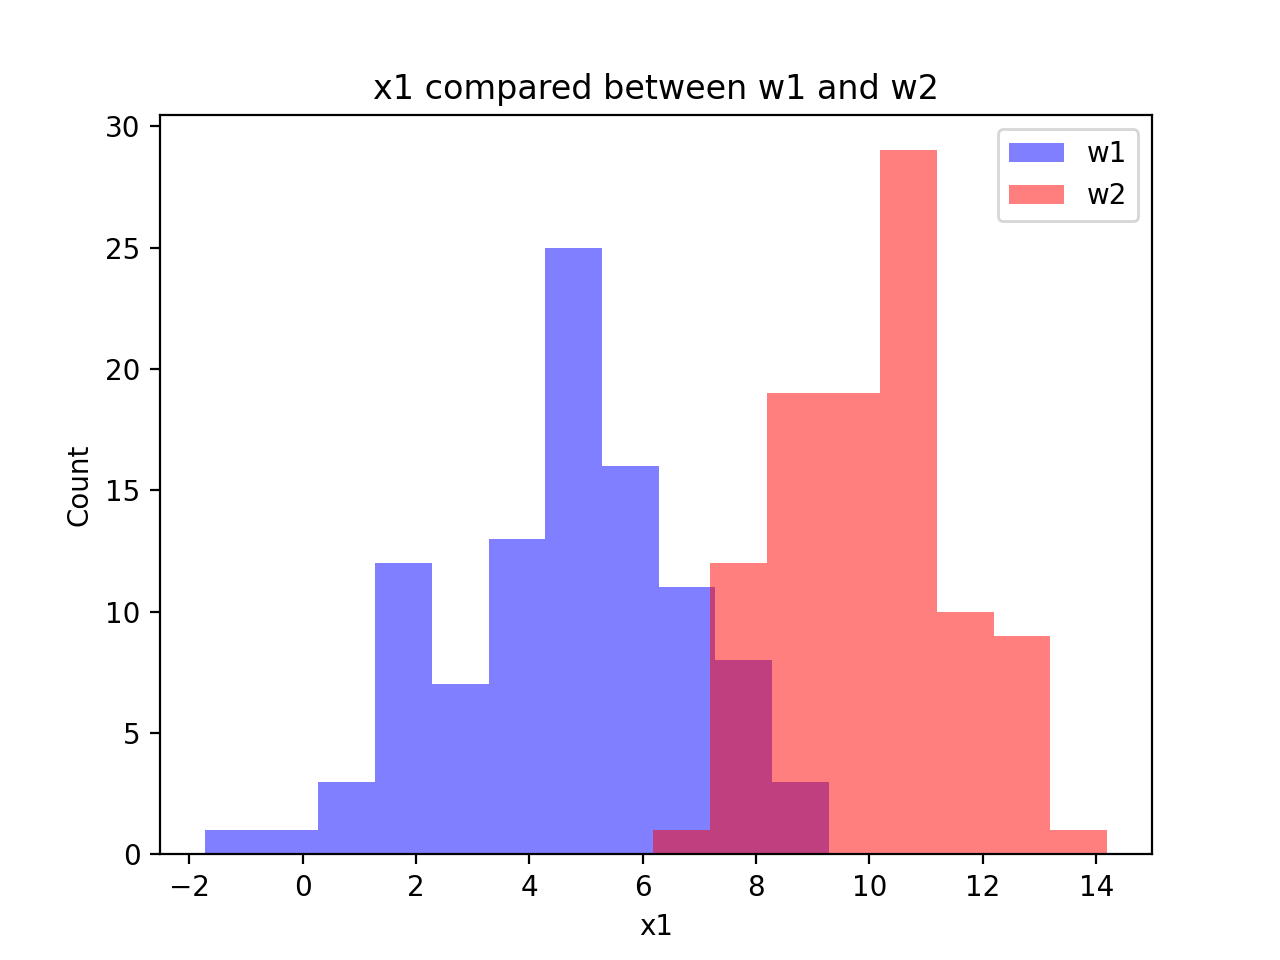

<IPython.core.display.Javascript object>


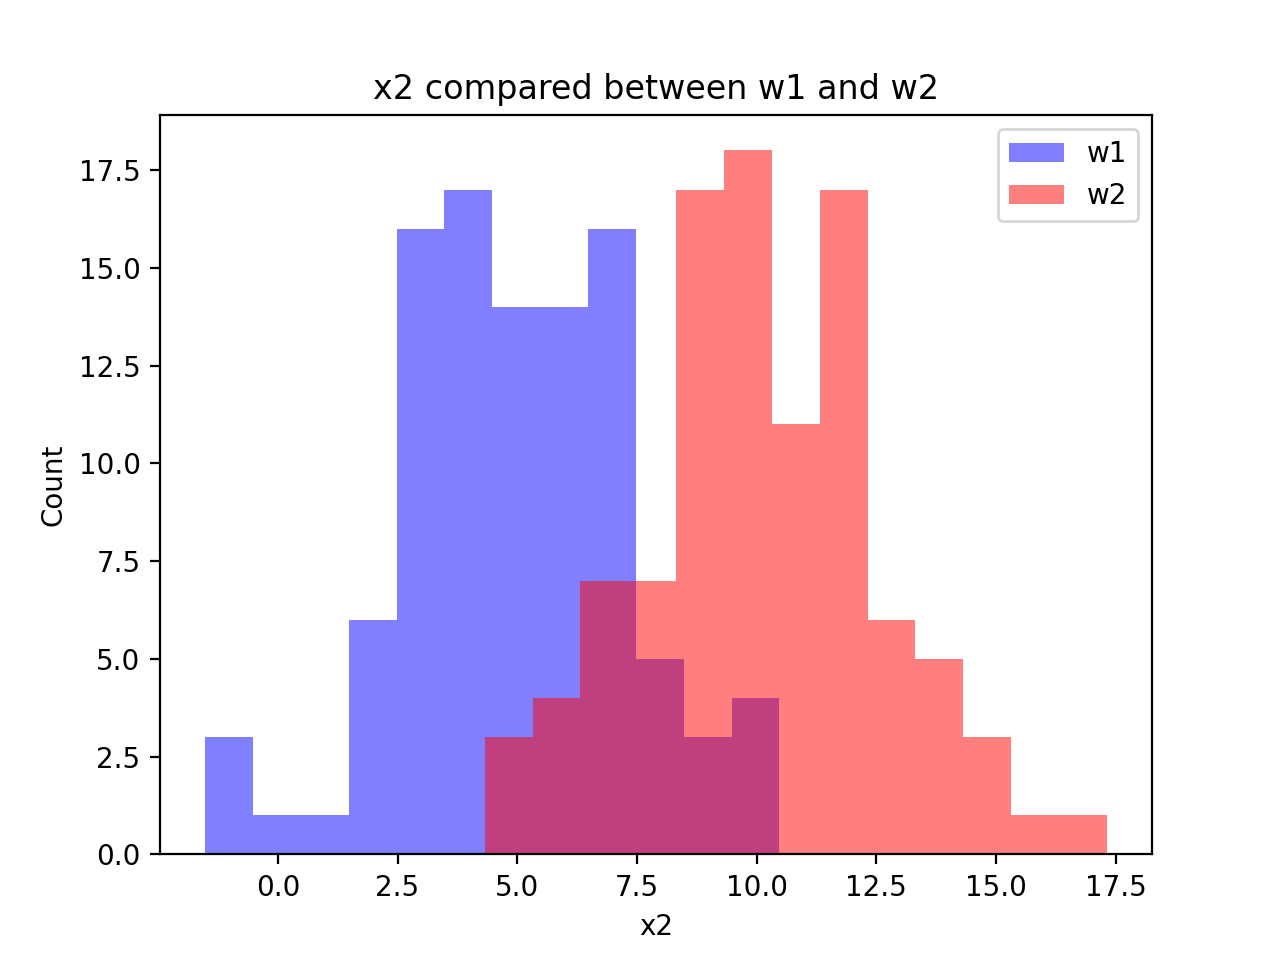

In [6]:
w1, w2, _ = grab_classes("patterns_labels.txt")

w1_x1 = np.array(w1)[:,0]
w2_x1 = np.array(w2)[:,0]

w1_x2 = np.array(w1)[:,1]
w2_x2 = np.array(w2)[:,1]

x_1_hist = plt.figure()
plt.xlabel("x1")
plt.ylabel("Count")
plt.title("x1 compared between w1 and w2")
plt.hist(w1_x1, alpha=0.5, label='w1', color='blue', bins=np.arange(min(w1_x1), max(w1_x1) + 1, 1))
plt.hist(w2_x1, alpha=0.5, label='w2', color='red', bins=np.arange(min(w2_x1), max(w2_x1) + 1, 1))
plt.legend(loc='upper right')

x_2_hist = plt.figure()
plt.xlabel("x2")
plt.ylabel("Count")
plt.title("x2 compared between w1 and w2")
plt.hist(w1_x2, alpha=0.5, label='w1', color='blue', bins=np.arange(min(w1_x2), max(w1_x2) + 1, 1))
plt.hist(w2_x2, alpha=0.5, label='w2', color='red', bins=np.arange(min(w2_x2), max(w2_x2) + 1, 1))
plt.legend(loc='upper right')

plt.show()


Yes, x1 is much more discriminatory than x2 (note: bin width of 1 was set in the histogram function above)

(b) [7 points] Plot the two-dimensional patterns in a graph. Use markers to distinguish the patterns
according to their class labels. Suppose you have the following decision rule (classifier) to classify
a novel pattern x = (x1, x2)t :
If x1 + x2 − 15 < 0, assign x → ω1, else assign x → ω2.
In the same graph, plot the decision boundary corresponding to this rule. What is the error rate
(i.e., the percentage of patterns that are misclassified) when this decision rule is used to classify
the patterns in the given data set?

<IPython.core.display.Javascript object>


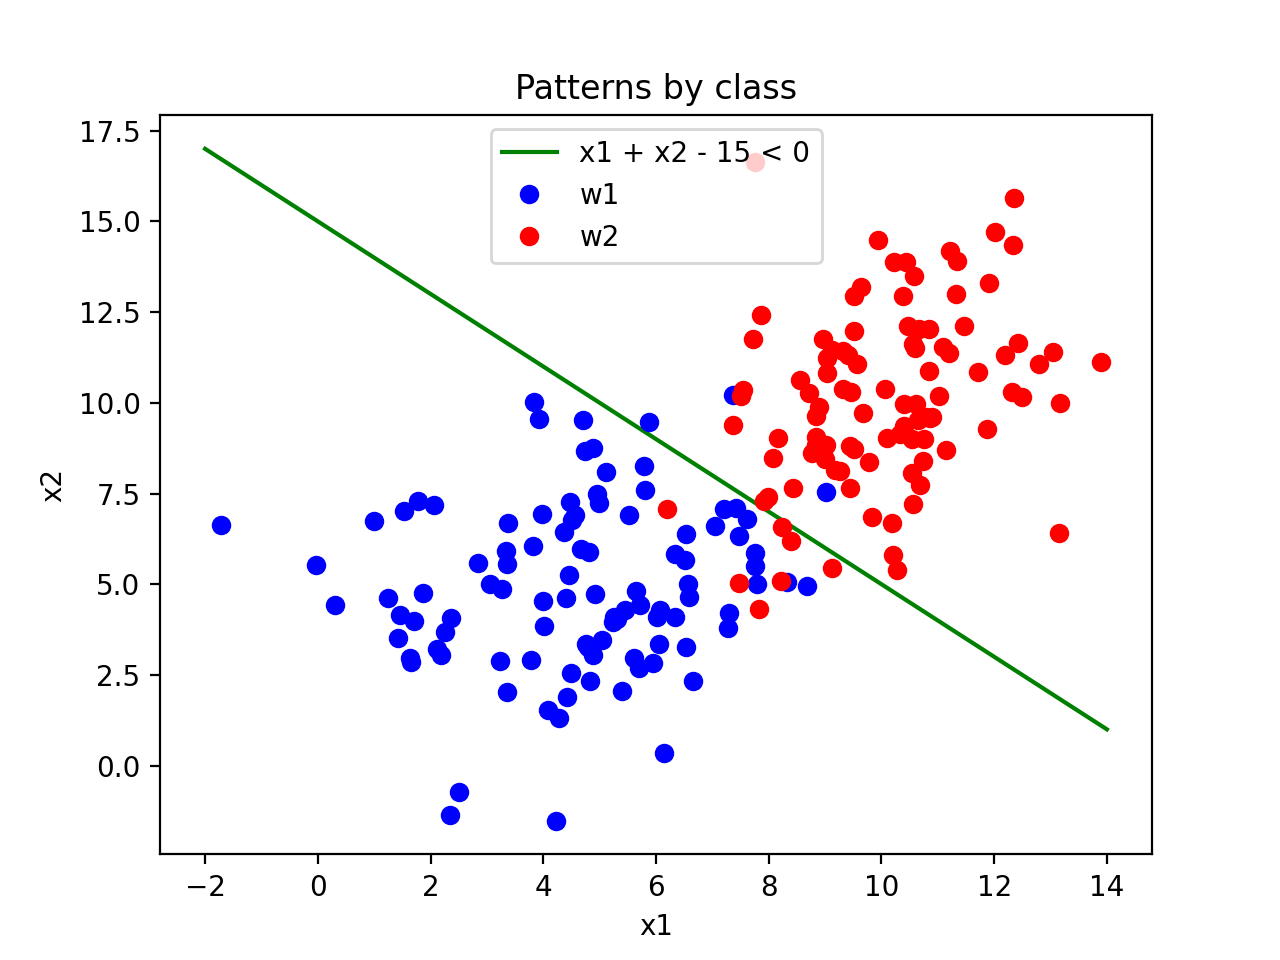

In [7]:
x1_f = np.linspace(-2, 14, 100)
x2_f = -1*x1_f + 15

plot = plt.figure()
plt.plot(x1_f, x2_f, '-g', label='x1 + x2 - 15 < 0')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Patterns by class")
plt.plot(w1_x1, w1_x2, 'bo', label="w1")
plt.plot(w2_x1, w2_x2, 'ro', label="w2")
plt.legend()


(c) [7 points] Repeat the above after modifying the decision rule (classifier) as follows:
If x1 + x2 − 12 < 0, assign x → ω1, else assign x → ω2.

<IPython.core.display.Javascript object>


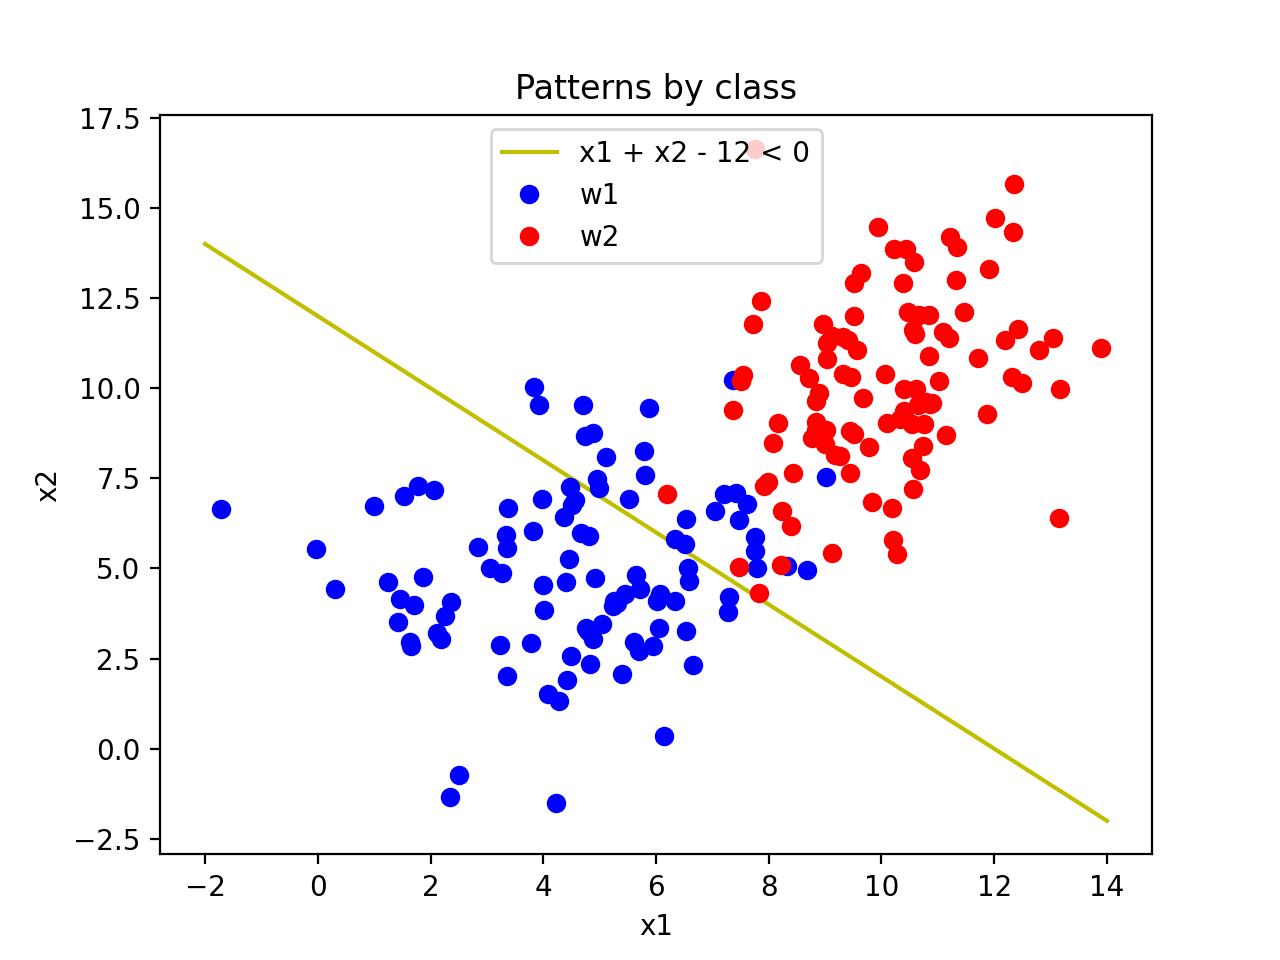

In [8]:
x1_f = np.linspace(-2, 14, 100)
x2_f = -1*x1_f + 12

plot = plt.figure()
plt.plot(x1_f, x2_f, '-y', label='x1 + x2 - 12 < 0')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Patterns by class")
plt.plot(w1_x1, w1_x2, 'bo', label="w1")
plt.plot(w2_x1, w2_x2, 'ro', label="w2")
plt.legend()

(d) [3 points] Which of the two classifiers has performed well on this dataset? (Note: These classifiers
were arbitrarily derived. As we will see later in the course, there is a principled way for obtaining
decision boundaries from training data).

The first classifier has performed slightly better due to misclassifying points in w1 significantly less than the second classifier.